<a href="https://colab.research.google.com/github/sener7106/TiL/blob/main/ML_Chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04-1 로지스틱 회귀

- 분류와 회귀 문제, 특성값을 전처리(Scaled)하거나 특성을 조합(다중회귀)하여 새로운 특성을 만들 수 있다.

In [1]:
# 데이터 준비하기

In [2]:
import numpy as np
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state =42)

## 데이터 전처리(스케일링)

In [15]:
# 데이터 전처리(스케일링)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## KNeighborsClassifier 의 확률 예측

In [16]:
# KNeighborsClassifier의 확률 예측

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- <b>다중분류(Multi-class Classification) </b> = 훈련 셋과 테스트 셋(타깃 데이터)에 2개 이상의 클래스가 포함된 문제

- 이진 분류와 모델을 만들고 훈련하는 방식은 동일. 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만, 사이킷런 패키지에서는 문자열로 된 타깃 값을 그대로 사용할 수 있음.

- 사이킷런의 분류모델은  **predict_proba()**  메서드로 클래스별 확률값을 반환. 

In [17]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [19]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [21]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


In [22]:
# 3개의 최근접 이웃을 활용한 모델에게 가능한 확률은 0/3, 1/3, 2/3, 3/3 4개의 확률만이 존재.. 수정이 필요

## 로지스틱 회귀(Logistic Regression)
- 회귀모델이라 쓰고 분류 모델이라 읽는다.

``` 
 z = a * (Weight) + b * (length) + c * (diagonal) + d * (height) + e * (width) + f

```



z는 어떤 값도 가능하지만 확률이 되려면 0~1 사이의 값이 되어야함. 
z가 큰 음수일 때 0이 되고, z가 아주 큰 양수 일때 1이 되는 함수.
-> sigmoid 함수를 사용

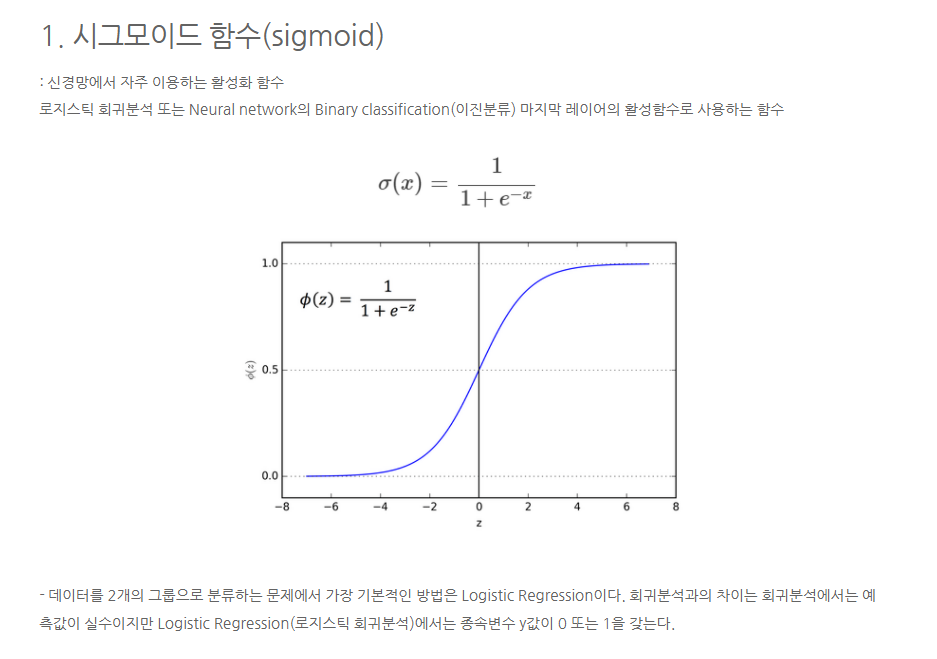

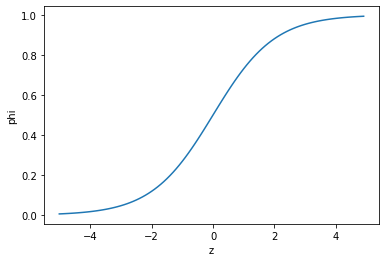

In [25]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [26]:
# 넘파이 배열의 불리언 인덱싱(Boolean indexing)

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 도미 or 방어인 행을 리턴
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [28]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [30]:
print(lr.predict_proba(train_bream_smelt[:5]))

# 0번열이 음성클래스, 1번열이 양성클래스의 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [32]:
print(lr.classes_) # Smelt 가 양성클ㄹ새ㅡ

['Bream' 'Smelt']


In [34]:
print(lr.coef_, lr.intercept_) 

# 로지스틱 회귀 모델 학습 방정식의 파라미터

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [36]:
# z값을 출력하는 decision_function
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [37]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- 이진 분류를 위해 2개의 target sample을 추출하고, 이를 이용하여 로지스틱 회귀 모델을 훈련
- predict_proba() 메서드로 음성, 양성클래스에 대한 확률 출력
- decision_function() 메서드로 양성클래스에 대한 z값을 계산

## 로지스틱 회귀를 이용한 다중 분류 수행

- LogisticRegression 클래스는 기본적으로 반복 알고리즘을 사용, max_iter 매개변수를 이용하여 반복횟수를 지정하며, 기본값은 100이다.

- 충분한 훈련을 위해 반복 횟수를 1000으로 지정.

- Logistic Regression의 Regularization
기본적으로 릿지 회귀아 같이 계수의 제곱을 규제 (L2)
릿지 -> alpha, 로지스틱 -> C... alpha와 반대로 작을수록 규제가 커지게 됨. C의 기본값은 1. 규제 완화를 위해 20으로 설정

In [38]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [39]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [42]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [43]:
# 다중 분류의 경우의 선형방정식

print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1로 변환
- 다중 분류에서는 소프트맥스(Softmax)함수를 사용하여 7개의 z값을 확률로 변환한다.

- e_sum = e^z1 + .. + e^z7

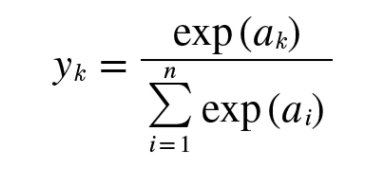

In [44]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [45]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) # 각행에 대해 softmax 함수 통과
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 04-2 확률적 경사 하강법 (Stochastic Gradient Descent)

- 이전에 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법
- 점진적학습 or 온라인 학습
- 경사를 따라 내려가는 방법. 가장 빠른 길은 경사가 가장 가파른길. 가장 가파른길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다.


<b> 확률적 </b> : 경사 하강법으로 내려올 때 가장 가파른 길을 찾는 방법은 훈련 셋을 이용하여 가장 가파른 길을 찾는다. 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 셋에서 랜덤하게 골라 가장 가파른 길을 찾는다.

- 이처럼 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것이 ** 확률적 경사 하강법 ** 이다.

- 에포크(epoch) : 훈련 세트를 한번 모두 사용하여 경사를 내려가는 과정
- 미니배치 경사하강법 : 무작위로 몇개의 샘플을 선택해서 경사를 내려가는 방법
- 배치 경사 하강법 : 극단적으로 한번 경사로를 이동하기 위해 전체 샘플을 사용하는 방법. 컴퓨팅 자원을 많이 소모하게되어 시간이 오래 걸릴 수도 있다.

- 만족할 만한 위치에 도달하지 못했을 경우 훈련 세트를 다시 채워서 도달할 때 까지 재수행.

### 가장 빨리 내려가야 하는 산, 손실함수(loss_function)

- 어떤 문제에서 머신러닝 알고리즘이 얼마나 잘못되었는지를 측정하는 기준. 손실함수의 값이 작을수록 좋다.

- 비용함수(Cost function) : 샘플 하나에 대한 손실을 정의하는 손실함수, 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합.

- 손실함수는 미분 가능해야 함. (Continuous)